In [ ]:
#1. (20 points) True or False.
#(a) In class imbalanced classification tasks, the goal is to find the model that has the highest accuracy. (False)
#(b) Over-fitting is the biggest issue with over-sampling. (True)
#(c) Under-fitting is the biggest issue with over-sampling. (False)
#(d) A model with a large number of input variables always have a good performance. (False)
#(e) If we run the SMOTE sampling technique multiple times on an imbalanced dataset, we will always obtain the same synthetic dataset. (False)
#(f) Having access to good data is better than having a good model. (True)
#(g) RFE works with any support vector machine model. (False)
#(h) RFE doesn’t work with any support vector machine model. (False)
#(i) A typical approach to engineer features is to consider interactions because most interactions help models to generate good predictions. (True)
#(j) The support vectors in support vector machine models can be used to identify important variables/featues. (True)

In [ ]:
#2. (5 points) How does the Recursive Feature Elimination (RFE) algorithm work? Be specific.

#The Recursive Feature Elimination (RFE) algorithm works just how it's name says it does, it elimintaes features that are least important, 
#the RFE starts by creating a model that then ranks the variables by their importance score, the least important variable is then removed and
#the process then repeats itself until the subset is found that fits the optimal model

In [ ]:
#3. (5 points) Explain one-hot encoding. Be specific.

# One-hot encoding is a process in which categorical data is converted into numerical data using a numerical label
#this happens when the categorical values (names) within a variable are put into categorical column, they are 
# then assigned a numerical value 

In [ ]:
#4. (5 points) If you have a date column in your data-frame, then how will you perform feature engineering on the date column? 
#List at least three features that you will engineer from date. Be specific.

#assuming that the date column is the regular Month/Day/Year format then we could make 3 features based off of those three labels as well,
# we could also dig a bit deeper and create a week of the year or season of the year feature as well, we could see  the variables
#for which dates specifically had the most important when it came to fraud compared to others


In [ ]:
# 5. (5 points) In what scenarios, would you prefer to use the precision-recall curve instead of ROC curve 
# to measure the performance of a classifier? Be specific.

#Whenever we are dealing with an imbalanced dataset we will want to use the precision recall curce becasue this helps to eliminate 
#the false positives within the dataset which is the goal ultimately when dealing with imbalanced data, ROC curves are better to use
#when we have a balanced dataset

In [ ]:
#6. (7 points) Explain the biggest drawback of one-vs-one multi-class classification when compared to one-vs-all multi-class classification.
#Be specific.
#The one vs one takes a lot longer time compared to the one vs all becasue it, as it says in its name, goes one by one and creates a 
#classification for each one rather than each category

In [ ]:
#7. (4 points) A data scientist is building a linear regression model. One of the input variables is a categorical variable with three labels.
#So, he decided to use the one-hot encoding approach to transform the categorical variable into dummy variables. How many dummy variables
#does he need to include in the linear model?

# C. 2


In [ ]:
#8. (7 points) Suppose you are building a fraud detection system for major US bank. You have access to all the transaction data for 
# the past week for users (date, location, and amount). What kind of new features can you engineer? Be creative and list at least three features
#that you would engineer for the fraud detection system.

#1. Distance Apart Feature - If two transactions from the card takes place from distances that are further than a set amount,
#then the system would recognise this and block the card and possibly inform the card-owner of the situation 

#2. Fraud Protection Feature - The system would limit the amount of transactions made above a certain amount, they could force 
#the user to enter a password or code and failure to authenticate would lock them out of the card

#3. Risk Score Feature- For each transaction a risk score is attached to it which is calcualted off of the 3 numerical variables given
#if the score surpases a certain threshold then it will block the account

In [ ]:
#9. Let’s assume that you are the data scientist in charge of this project. The goal is to build a classification system that can flag 
#future credit card payments that are likely to default.
#Answer the following:
#(a) (3 points) Is the dataset imbalanced? Be specific.
#(b) (5 points) Using the above chart, engineer one feature for your classification model. Be specific.

#A The data set is definetly imbalanced just even looking by a first glance there are at least double and probably actualy more than triple
#the amount of blue dots to orange dots

#B A feature I would engineer is if the account balance has more or less than 1500 in its balance as this looks like it would be a key 
#indicator of whether or not the card defaulted


In [ ]:
# 10. (4 points) Which of the following is/are TRUE feature subset selection?

# C. Subset selection can reduce over-fitting.

In [ ]:
# 11. (4 points) A data scientist is building a regression model. A few of the input variables are categorical, 
# and he has not looked at the distribution of the categorical data in the test data. The data scientist wants to apply the one-hot encoding 
# on the categorical features. What challenges he may face if he have applied one-hot encoding on a categorical variable of the train dataset?

#  D. A and B

In [ ]:
# 12. (5 points) What is the difference between feature engineering and feature selection? Be specific.

# In feature engineering you are creating new features that you think will help to improve the capabilites of predicting in the overall model, 
# so you are taking the data and further adding to it, whereas in feature selection you are choosing which variables are the most important
# to keep in the final model in order to help it perform better overall, so you are not adding anything to the model neccisarily


In [ ]:
# 13. (5 points) Based on the discussions from Chapter 4, list at least two benefits of feature selection. Be specific.

# 1. It reduces the computing time of the model in general as there is not as many variables to account for in the model
# 2. The accuracy is improved when you take away unnecasry variables that would have otherwise skewed the model towards a certain bias

In [ ]:
# 14. Based on the F1-score, what model would use to make predictions? Be specific

# I would use model two becasue it is consistently the most accurate model of the 3 across all of the folds 

In [13]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
import precision_recall_cutoff as prc
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report
from tqdm import tqdm

# Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445-wagner'
bucket = s3.Bucket(bucket_name)

# Defining the file to be read from s3 bucket
file_key = "train(1).csv"
file_key2 = "test(1).csv"

bucket_object = bucket.Object(file_key)
bucket_object2 = bucket.Object(file_key2)

file_object = bucket_object.get()
file_object2 = bucket_object2.get()

file_content_stream = file_object.get('Body')
file_content_stream2 = file_object2.get('Body')

#reading the csv file
train = pd.read_csv(file_content_stream)
test = pd.read_csv(file_content_stream2)

train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,400000,1,1,2,32,0,0,0,0,0,0,55773,55917,51389,48272,49478,51242,3028,3023,3000,3000,3000,38662,0
1,120000,2,2,2,30,-1,-1,-1,-1,-1,-1,140,3230,3011,1964,1883,1538,3230,3011,1964,1883,1538,1911,0
2,270000,2,2,2,32,0,0,0,0,0,0,59710,49986,104390,94856,86461,83650,1808,69563,2891,2689,3012,2771,0
3,280000,2,2,1,27,0,0,0,0,0,0,280913,283222,273160,257689,193231,191143,11052,9563,15017,5374,5420,6021,0
4,30000,2,1,2,27,0,0,-1,0,0,-2,1512,2458,664,1814,0,0,1000,664,1500,0,0,0,0


In [14]:
#creating frequency table
train['default payment next month'].value_counts()/ train.shape[0]

0    0.778792
1    0.221208
Name: default payment next month, dtype: float64

In [15]:
#splitting data and checking to make sure the categorical values are the same within train and test

## Creating ID columns
train['ID'] = list(range(1, train.shape[0] + 1))

## Splitting the data into train and test
training = train.groupby('default payment next month', group_keys = False).apply(lambda x: x.sample(frac = 0.8))
testing = train[~np.isin(train['ID'], training['ID'])]

## Dropping ID
train = train.drop(columns = ['ID'])
training = training.drop(columns = 'ID', axis = 1)
testing = testing.drop(columns = 'ID', axis = 1)

#printing data sets
print(training.shape)
print(testing.shape)

(19200, 24)
(4800, 24)


In [16]:
#Defining the input and target variables
X_training = training.drop(columns = ['default payment next month'])
Y_training = training['default payment next month']

#Splitting the data
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_training, Y_training, test_size = 0.2, stratify = Y_training)

[Text(558.0, 856.1700000000001, 'PAY_0 <= 1.5\ngini = 0.345\nsamples = 15360\nvalue = [11962, 3398]'),
 Text(279.0, 611.55, 'PAY_2 <= 0.5\ngini = 0.276\nsamples = 13725\nvalue = [11459, 2266]'),
 Text(139.5, 366.93000000000006, 'PAY_AMT3 <= 395.0\ngini = 0.246\nsamples = 12558\nvalue = [10755, 1803]'),
 Text(69.75, 122.30999999999995, 'gini = 0.351\nsamples = 3021\nvalue = [2336, 685]'),
 Text(209.25, 122.30999999999995, 'gini = 0.207\nsamples = 9537\nvalue = [8419, 1118]'),
 Text(418.5, 366.93000000000006, 'PAY_5 <= 1.0\ngini = 0.479\nsamples = 1167\nvalue = [704, 463]'),
 Text(348.75, 122.30999999999995, 'gini = 0.457\nsamples = 830\nvalue = [537, 293]'),
 Text(488.25, 122.30999999999995, 'gini = 0.5\nsamples = 337\nvalue = [167, 170]'),
 Text(837.0, 611.55, 'PAY_3 <= -0.5\ngini = 0.426\nsamples = 1635\nvalue = [503, 1132]'),
 Text(697.5, 366.93000000000006, 'BILL_AMT3 <= 110.5\ngini = 0.5\nsamples = 104\nvalue = [52, 52]'),
 Text(627.75, 122.30999999999995, 'gini = 0.405\nsamples = 

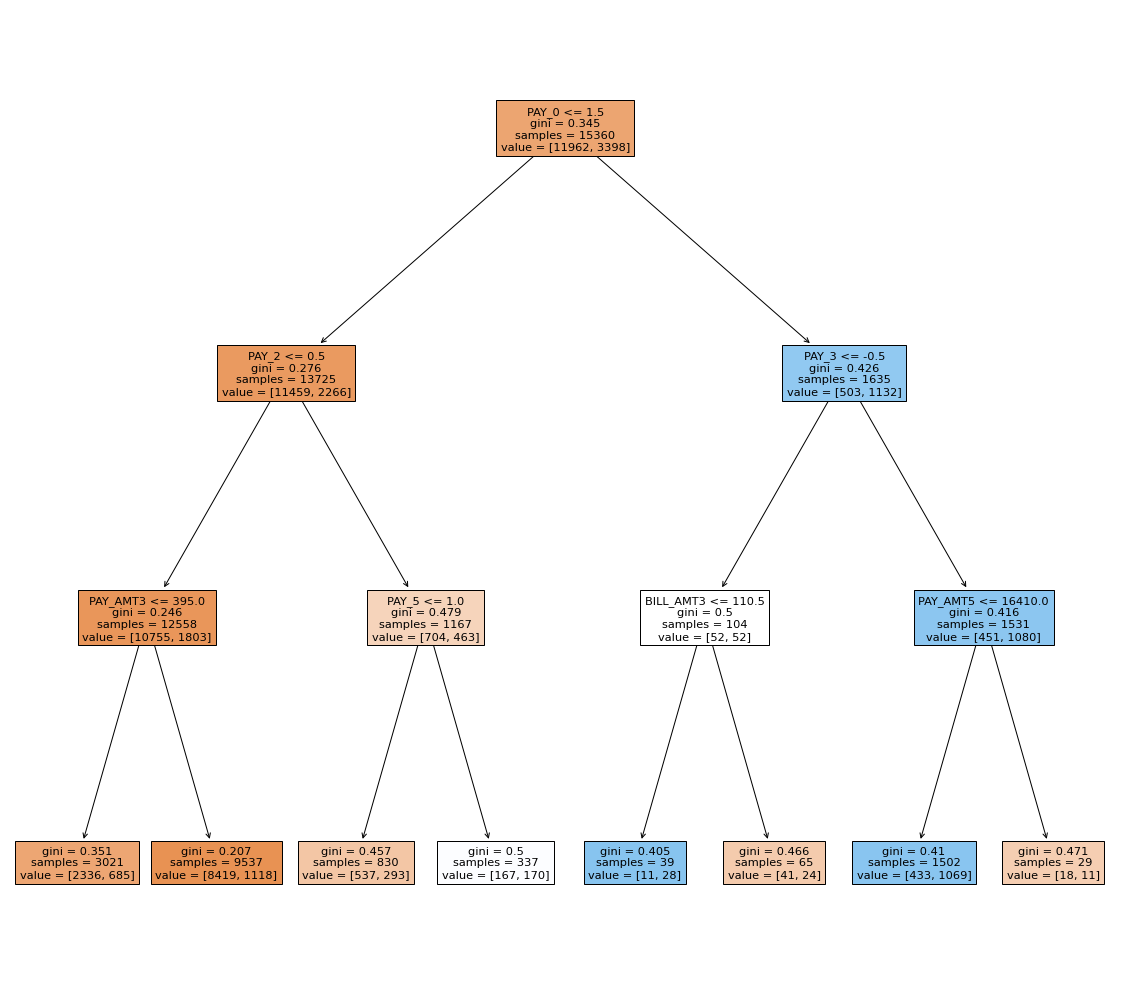

In [6]:
#Building model for decision tree
md1 = DecisionTreeClassifier(max_depth = 3).fit(X_train1, Y_train1)

#Visualizing model
fig = plt.figure(figsize = (20, 18))
plot_tree(md1, feature_names = X_training.columns, filled = True)


In [7]:
#Computing variable importances
#Identifying top features
results = list()

for i in tqdm(range(0, 100)):
   #Splitting the data
    X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_training, Y_training, test_size = 0.2, stratify = Y_training)  
    
    #Building the random forest model
    RF = RandomForestClassifier(max_depth = 3, n_estimators = 500).fit(X_train1, Y_train1)
    
    #Extracting feature importances
    results.append(RF.feature_importances_)

#Changing to data frame
results = pd.DataFrame(results)
results.columns = X_training.columns


#computing averages and sorting importances
results = pd.DataFrame(results.apply(np.mean, axis = 0))
results = pd.DataFrame({'Feature': results.index, 'Importance': results[0].values})
results = results.sort_values(by = 'Importance', ascending = False)
results


100%|██████████| 100/100 [07:07<00:00,  4.27s/it]


,Feature,Importance
5,PAY_0,0.308427
6,PAY_2,0.196701
7,PAY_3,0.122196
8,PAY_4,0.092742
9,PAY_5,0.079240
10,PAY_6,0.061089
17,PAY_AMT1,0.034130
0,LIMIT_BAL,0.020088
18,PAY_AMT2,0.018525
19,PAY_AMT3,0.017256


In [17]:
#creating features
#1
#total payment amount
training['Total_Payment_Amount'] = np.sum(training[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']], axis = 1)
#2
#total payment
training['Total_Payment'] = np.sum(training[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']], axis = 1)
#3
#total bill amount
training['Total_Bill_Amount'] = np.sum(training[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], axis = 1)

#top 2 features from strong heredity
#4
training['Heredity1']= training['PAY_0']*training['PAY_2']
#5
training['Heredity2']= training['PAY_0']*training['PAY_3']

#choosing 2 features from decision tree
#6
training['DecisionTree1'] = np.where((training['PAY_0'] <= 1.5) & (training['PAY_2'] <= 0.5) & (training['PAY_AMT3'] <= 395.0), 1, 0)
#7
training['DecisionTree2'] = np.where((training['PAY_0'] <= 1.5) & (training['PAY_2'] <= 0.5) & (training['PAY_AMT3'] >= 395.0), 1, 0)




In [18]:
#re-creating variables in testing datasets
#total payment amount
testing['Total_Payment_Amount'] = np.sum(testing[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']], axis = 1)
#2
#total payment
testing['Total_Payment'] = np.sum(testing[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']], axis = 1)
#3
#total bill amount
testing['Total_Bill_Amount'] = np.sum(testing[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], axis = 1)

#top 2 features from strong heredity
#4
testing['Heredity1']= testing['PAY_0']*testing['PAY_2']
#5
testing['Heredity2']= testing['PAY_0']*testing['PAY_3']

#choosing 2 features from decision tree
#6
testing['DecisionTree1'] = np.where((testing['PAY_0'] <= 1.5) & (testing['PAY_2'] <= 0.5) & (testing['PAY_AMT3'] <= 395.0), 1, 0)
#7
testing['DecisionTree2'] = np.where((testing['PAY_0'] <= 1.5) & (testing['PAY_2'] <= 0.5) & (testing['PAY_AMT3'] <= 395.0), 1, 0)

#test dataset

#total payment amount
test['Total_Payment_Amount'] = np.sum(test[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']], axis = 1)
#2
#total payment
test['Total_Payment'] = np.sum(test[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']], axis = 1)
#3
#total bill amount
test['Total_Bill_Amount'] = np.sum(test[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], axis = 1)

#top 2 features from strong heredity
#4
test['Heredity1']= test['PAY_0']*test['PAY_2']
#5
test['Heredity2']= test['PAY_0']*test['PAY_3']

#choosing 2 features from decision tree
#6
test['DecisionTree1'] = np.where((test['PAY_0'] <= 1.5) & (test['PAY_2'] <= 0.5) & (test['PAY_AMT3'] <= 395.0), 1, 0)
#7
test['DecisionTree2'] = np.where((test['PAY_0'] <= 1.5) & (test['PAY_2'] <= 0.5) & (test['PAY_AMT3'] <= 395.0), 1, 0)


In [13]:
#running RFE model with new features

#Defining input and target variables
X_training = training.drop(columns = ['default payment next month'])
Y_training = training['default payment next month']

#creating list for results
results = []

#creating loop
for i in tqdm(range(0, 50)): #ran out of time so changed to 50 iterations 
    
    #Splitting the data
    X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_training, Y_training, test_size = 0.2, stratify = Y_training)  
    
    #Running RFEC with random forrest
    rf_rfe = RFECV(estimator = RandomForestClassifier(max_depth = 3, n_estimators = 500), step = 1, min_features_to_select = 2, cv = 3).fit(X_train1, Y_train1)
    
    #Appending features to be selected
    results.append(rf_rfe.support_)
    
#Changing results list a to data-frame
rfe_results = pd.DataFrame(results, columns = X_training.columns)

#creating list of results based off of importance
importance_list = 100 * rfe_results.apply(np.sum, axis = 0) / rfe_results.shape[0]


100%|██████████| 50/50 [4:09:36<00:00, 299.53s/it]  


In [14]:
importance_list

LIMIT_BAL                 0.0
SEX                       0.0
EDUCATION                 0.0
MARRIAGE                  0.0
AGE                       0.0
PAY_0                   100.0
PAY_2                    94.0
PAY_3                    44.0
PAY_4                    10.0
PAY_5                     4.0
PAY_6                     2.0
BILL_AMT1                 0.0
BILL_AMT2                 0.0
BILL_AMT3                 0.0
BILL_AMT4                 0.0
BILL_AMT5                 0.0
BILL_AMT6                 0.0
PAY_AMT1                  2.0
PAY_AMT2                  2.0
PAY_AMT3                  2.0
PAY_AMT4                  0.0
PAY_AMT5                  0.0
PAY_AMT6                  0.0
Total_Payment_Amount      2.0
Total_Payment           100.0
Total_Bill_Amount         2.0
Heredity1                 6.0
Heredity2                 2.0
DecisionTree1             2.0
DecisionTree2            82.0
dtype: float64

In [24]:
#using top 5 variables to create new random forrest model
# Defining variables
X_training = training[['PAY_0','Total_Payment', 'PAY_2', 'DecisionTree2','PAY_3' ]]
Y_training = training['default payment next month']
X_testing = testing[['PAY_0','Total_Payment', 'PAY_2', 'DecisionTree2','PAY_3']]
Y_testing = testing['default payment next month']

#Building random forest model  
RF = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_training, Y_training)

#Predicting test
RF_pred = RF.predict_proba(X_testing)[:, 1]

#Predicting labels
RF_labels = prc.precision_recall_cutoff(Y_testing, RF_pred)
#Printing classification report
print(classification_report(Y_testing, RF_labels))



              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3738
           1       0.52      0.52      0.52      1062

    accuracy                           0.79      4800
   macro avg       0.69      0.69      0.69      4800
weighted avg       0.79      0.79      0.79      4800



In [1]:
#using top 6 variables to create new random forrest model
# Defining variables
X_training = training[['PAY_0','Total_Payment', 'PAY_2', 'DecisionTree2','PAY_3', 'PAY_4']]
Y_training = training['default payment next month']
X_testing = testing[['PAY_0','Total_Payment', 'PAY_2', 'DecisionTree2','PAY_3', 'PAY_4']]
Y_testing = testing['default payment next month']

#Building random forest model  
RF1 = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_training, Y_training)

#Predicting test
RF_pred1 = RF1.predict_proba(X_testing)[:, 1]

#Predicting labels
RF_labels1 = prc.precision_recall_cutoff(Y_testing, RF_pred1)

#Printing classification report
print(classification_report(Y_testing, RF_labels1))

NameError: name 'training' is not defined

In [ ]:
# The model with the top 5 variables is slightly more accurate so is this the model I would use

In [21]:
#using model to now predict on the test data frame
# Defining variables
X_training = training[['PAY_0','Total_Payment', 'PAY_2', 'DecisionTree2','PAY_3' ]]
Y_training = training['default payment next month']
X_test = test[['PAY_0','Total_Payment', 'PAY_2', 'DecisionTree2','PAY_3' ]]
## Building the model
rf_md = RandomForestClassifier(max_depth = 3, n_estimators = 500).fit(X_training, Y_training)

## Predicting on the testing set
rf_preds = rf_md.predict_proba(X_test)[:, 1]

## Creating a data-frame to store results
likelihoods = pd.DataFrame({'Likelihoods': rf_preds})

## Exporting predicted likelihoods as a csv file
likelihoods.to_csv('likelihoods.csv', index = False)
